# Semestral project for MFF UK - Marketing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cx_Oracle
import json
from matplotlib.backends.backend_pdf import PdfPages
import os
import functools  #reduce

***The dataset we will be working with can be found at:*** [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

*Github of the project is currently private, but will be published once it is finished*

### About the dataset

It is concerned with the results of a broad marketing campaign across more than 2000 participants. The dataset includes some metadata about the respondents familial background - such as Income, Marital status, or whether there are teenagers living in the household - and details about the purchased data - whether the products were bought as a part of a deal, their quantities, and others. We will be analysing this dataset in a comprehensive manner, examining different quantities, looking for correlations, identifying different groups of citizens that are more prone to certain products, and more.

Now, let us finally open our data:

In [3]:
campaign = pd.read_csv('data/marketing_campaign.csv', sep='\t')
campaign.fillna(campaign.median(numeric_only=True).round(0), inplace=True)
campaign.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


Now that our data is loaded, let us see gow many respondents there actually are, as well as examine the distributions of education, of marital status, and of kid amounts, to get a rough idea with what groups of people we are dealing with.

There are 2240 entries and 29 columns


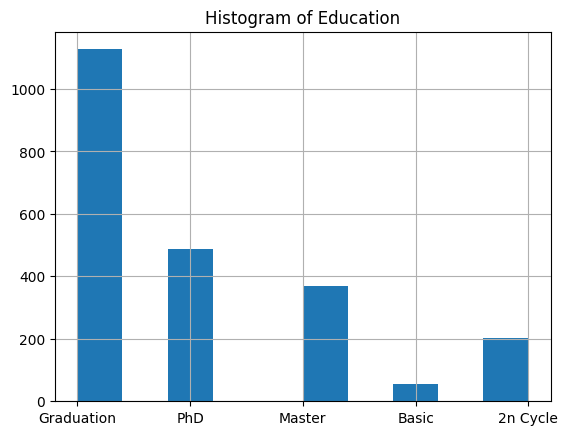

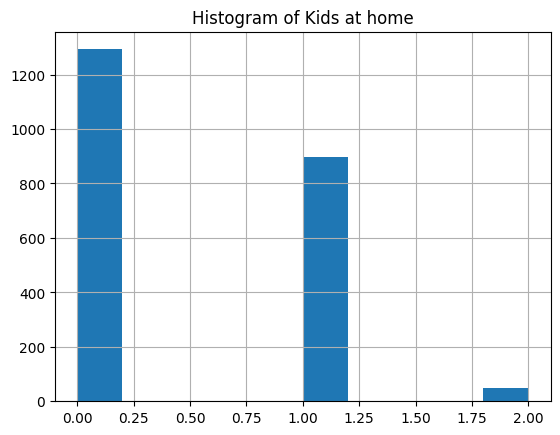

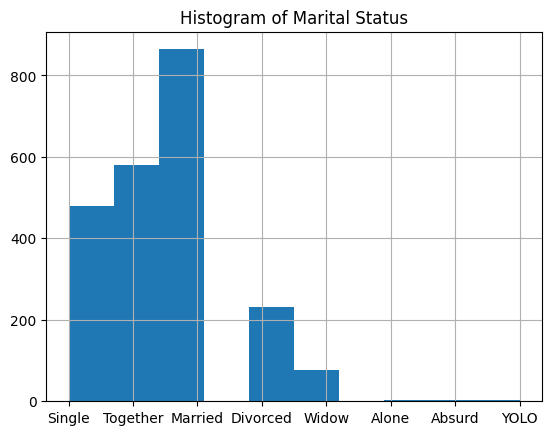

In [10]:
print('There are {} entries and {} columns'.format(campaign.shape[0], campaign.shape[1]))
ed_hist = campaign['Education'].hist()
plt.title('Histogram of Education')
plt.show()

kids_hist = campaign['Kidhome'].hist()
plt.title('Histogram of Kids at home')
plt.show()

ed_hist = campaign['Marital_Status'].hist()
plt.title('Histogram of Marital Status')
plt.show()

And manually for income:

In [11]:
np.max(campaign['Income'])

666666.0

(array([1678,  554,    7,    0,    0,    0,    0,    0,    0,    1],
      dtype=int64), array([  1730. ,  68223.6, 134717.2, 201210.8, 267704.4, 334198. ,
       400691.6, 467185.2, 533678.8, 600172.4, 666666. ]))


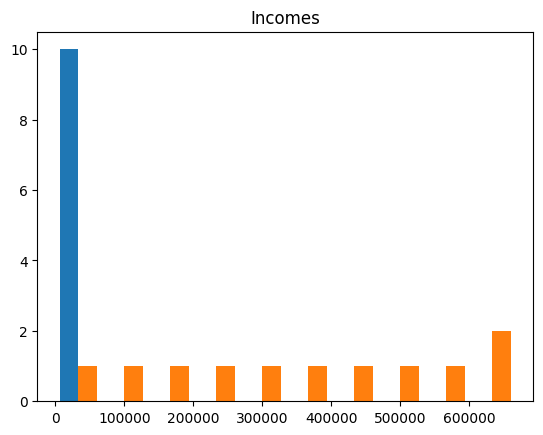

In [13]:
inc_hist = np.histogram(campaign['Income'])
print(inc_hist)
plt.hist(inc_hist)
plt.title('Incomes')
plt.show()

**Author:** *Martin Gráf*